<a href="https://colab.research.google.com/github/NguyenVanLuu821/AI_Excerise_week13/blob/main/Detect_face_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import library

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

#2.Load data

In [4]:
#Load Data 
with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

#handling data
x_train = x_train.astype('float32')
x_train /= 255

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, 3)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

#3.Create model

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

#4.Training

In [12]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 175ms/step - loss: 0.4001 - accuracy: 0.9628 - val_loss: 3.0685e-07 - val_accuracy: 1.0000
Epoch 2/15
4/4 [==============================] - 0s 112ms/step - loss: 0.7349 - accuracy: 0.8791 - val_loss: 1.2300e-04 - val_accuracy: 1.0000
Epoch 3/15
4/4 [==============================] - 0s 116ms/step - loss: 2.4633e-04 - accuracy: 1.0000 - val_loss: 5.0775e-04 - val_accuracy: 1.0000
Epoch 4/15
4/4 [==============================] - 0s 114ms/step - loss: 3.1306e-04 - accuracy: 1.0000 - val_loss: 0.0399 - val_accuracy: 0.9815
Epoch 5/15
4/4 [==============================] - 0s 114ms/step - loss: 0.0082 - accuracy: 0.9953 - val_loss: 3.7350e-06 - val_accuracy: 1.0000
Epoch 6/15
4/4 [==============================] - 0s 121ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.1613e-04 - val_accuracy: 1.0000
Epoch 7/15
4/4 [==============================] - 0s 116ms/step - loss: 1.5595e-06 - accuracy: 1.0000 - val_loss: 3.5321e-08 - val_accuracy: 1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


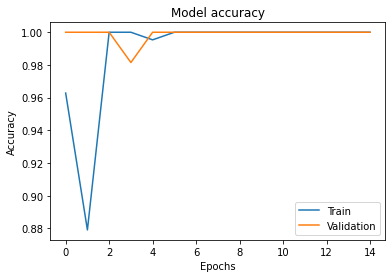

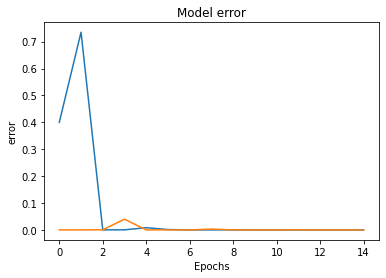

In [13]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

In [17]:
#save model
model_json = model.to_json()
with open('DetectFace_cnn.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('DetectFace_cnn.h5')

#5.Predict

In [14]:
label = ['An', 'Luu', 'Thanh']

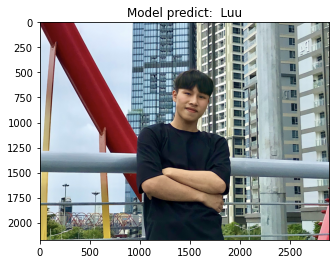

In [15]:
#import img
img = cv2.resize(cv2.imread('Luu.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)

#detect face 
plt.title("Model predict:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('Luu.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

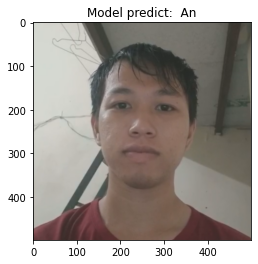

In [16]:
#import img
img = cv2.resize(cv2.imread('An.png'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)

#detect face 
plt.title("Model predict:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('An.png'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))